<a href="https://colab.research.google.com/github/SaahilShaikh17/Forgery-Detection-Hackrx/blob/main/hackrx_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

from google.colab import drive

ModuleNotFoundError: No module named 'google.colab'

In [17]:
# Mount the Google Drive
drive.mount('/content/drive',force_remount=True)

# Define paths for genuine and forged folders in your Google Drive
base_dir = '/content/drive/My Drive/Bajaj-HackRX/datasets'


forged_dir = os.path.join(base_dir, 'forged')
genuine_dir = os.path.join(base_dir, 'genuine')

preprocessed_forged_dir = os.path.join(base_dir, 'preprocessed_forged')
preprocessed_genuine_dir = os.path.join(base_dir, 'preprocessed_genuine')

augmented_forged_dir = os.path.join(base_dir, 'augmented_forged')
augmented_genuine_dir = os.path.join(base_dir, 'augmented_genuine')

# Create base output directories if they don't exist
os.makedirs(preprocessed_forged_dir, exist_ok=True)
os.makedirs(preprocessed_genuine_dir, exist_ok=True)
os.makedirs(augmented_forged_dir, exist_ok=True) # Augemented forged dir
os.makedirs(augmented_genuine_dir, exist_ok=True) # Augemented genuine dir

Mounted at /content/drive


In [ ]:
# Parameters for resizing
resize_dims = (2048, 2048)
'''
using 2048x2048 so that all images have the same dimensions, making it easier
for further preprocessing and model training
'''

'\nusing 2048x2048 so that all images have the same dimensions, making it easier\nfor further preprocessing and model training\n'

In [ ]:
# Function to preprocess an image
def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    if image is None:
        print(f"Failed to load image {image_path}")
        return None

    # Rescaling: Resize the image
    image_resized = cv2.resize(image, resize_dims, interpolation=cv2.INTER_LINEAR)

    # Denoising: Use Bilateral filtering (you can change to Gaussian or Median if needed)
    image_denoised = cv2.bilateralFilter(image_resized, d=9, sigmaColor=75, sigmaSpace=75)

    ''' The commented code is to denoise and adjust the contrast the image '''
    # # Contrast Adjustment: Histogram Equalization (convert to grayscale first)
    # image_gray = cv2.cvtColor(image_denoised, cv2.COLOR_BGR2GRAY)
    # image_equalized = cv2.equalizeHist(image_gray)

    # Convert back to BGR format
    # image_preprocessed = cv2.cvtColor(image_equalized, cv2.COLOR_GRAY2BGR)

    return image_denoised

In [ ]:
# Function to process images in a directory and save to corresponding output folder
def process_images(input_dir, output_dir):
    for root, dirs, files in os.walk(input_dir):
        # Create corresponding output directories
        rel_path = os.path.relpath(root, input_dir)  # Relative path from input_dir
        output_subdir = os.path.join(output_dir, rel_path)  # Corresponding subdir in output_dir
        os.makedirs(output_subdir, exist_ok=True)  # Create the subdir if it doesn't exist

        for file in files:
            if file.endswith(('.tif', '.png')):  # Only process .tif and .png images
                input_image_path = os.path.join(root, file)

                # Modify filename by appending 'p' before the extension
                file_name, file_ext = os.path.splitext(file)
                new_file_name = f"{file_name}p{file_ext}"

                output_image_path = os.path.join(output_subdir, new_file_name)

                # Preprocess and save the image
                preprocessed_image = preprocess_image(input_image_path)
                if preprocessed_image is not None:
                    cv2.imwrite(output_image_path, preprocessed_image)
                    print(f"Saved preprocessed image: {output_image_path}")

# Process forged images and save in preprocessed_forged with the same subfolder structure
process_images(forged_dir, preprocessed_forged_dir)

# Process genuine images and save in preprocessed_genuine with the same subfolder structure
process_images(genuine_dir, preprocessed_genuine_dir)

Saved preprocessed image: /content/drive/My Drive/Bajaj-HackRX/datasets/preprocessed_forged/./forged-type01-004p.tif
Saved preprocessed image: /content/drive/My Drive/Bajaj-HackRX/datasets/preprocessed_forged/./forged-type01-002p.tif
Saved preprocessed image: /content/drive/My Drive/Bajaj-HackRX/datasets/preprocessed_forged/./forged-type01-007p.tif
Saved preprocessed image: /content/drive/My Drive/Bajaj-HackRX/datasets/preprocessed_forged/./forged-type01-003p.tif
Saved preprocessed image: /content/drive/My Drive/Bajaj-HackRX/datasets/preprocessed_forged/./forged-type01-009p.tif
Saved preprocessed image: /content/drive/My Drive/Bajaj-HackRX/datasets/preprocessed_forged/./forged-type01-008p.tif
Saved preprocessed image: /content/drive/My Drive/Bajaj-HackRX/datasets/preprocessed_forged/./forged-type01-001p.tif
Saved preprocessed image: /content/drive/My Drive/Bajaj-HackRX/datasets/preprocessed_forged/./forged-type02-008p.tif
Saved preprocessed image: /content/drive/My Drive/Bajaj-HackRX/d

# <b> Forged Augmentation

In [ ]:
# import os
# from PIL import Image
# import numpy as np

# def load_images_from_folder(folder_path):
#     images = []
#     for filename in os.listdir(folder_path):
#         img_path = os.path.join(folder_path, filename)
#         img = Image.open(img_path)
#         images.append(np.array(img))
#     return images

# preprocessed_images = load_images_from_folder('https://drive.google.com/drive/folders/1N-CVvCMGkkW4iA5qjo9hT3gFpq9Ala1H?usp=drive_link')


##Set Up Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##Apply Augmentation and Save Images

In [ ]:
# # Create output directory if it doesn't exist
# def augment_preprocessed_forged(input_dir, output_dir):
#   # if not os.path.exists(output_folder):
#   #     os.makedirs(output_folder)
#   datagen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest'
#     )

#   for root, dirs, files in os.walk(input_dir):
#     rel_path = os.path.relpath(root, input_dir)  # Relative path from input_dir
#     output_subdir = os.path.join(output_dir, rel_path)  # Corresponding subdir in output_dir
#     os.makedirs(output_subdir, exist_ok=True)  # Create the subdir if it doesn't exist

#   for file in files:
#     file_path = os.path.join(root, file)
#     img = Image.open(file_path)
#     img_array = np.array(img)
#     img_array = np.expand_dims(img_array, 0)  # Add batch dimension

#     # Apply augmentation and save images
#     for batch in datagen.flow(img_array, batch_size=1):
#         augmented_image = batch[0].astype('uint8')  # Convert back to uint8
#         augmented_img = Image.fromarray(augmented_image)

#         # Save augmented image
#         augmented_img_path = os.path.join(output_subdir, f'augmented_{file}')
#         augmented_img.save(augmented_img_path)
#         break  # Stop after saving one augmented image per original image

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import os

def augment_preprocessed_forged(input_dir, output_dir):
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    for root, dirs, files in os.walk(input_dir):
        rel_path = os.path.relpath(root, input_dir)  # Relative path from input_dir
        output_subdir = os.path.join(output_dir, rel_path)  # Corresponding subdir in output_dir
        os.makedirs(output_subdir, exist_ok=True)  # Create the subdir if it doesn't exist

        for file in files:
            file_path = os.path.join(root, file)
            img = Image.open(file_path)
            img_array = np.array(img)
            img_array = np.expand_dims(img_array, 0)  # Add batch dimension

            # Apply augmentation and save images
            for batch in datagen.flow(img_array, batch_size=1):
                augmented_image = batch[0].astype('uint8')  # Convert back to uint8
                augmented_img = Image.fromarray(augmented_image)

                # Save augmented image
                augmented_img_path = os.path.join(output_subdir, f'augmented_{file}')
                augmented_img.save(augmented_img_path)
                break  # Stop after saving one augmented image per original image

# Define your directories
base_dir = '/content/drive/My Drive/Bajaj-HackRX/datasets'
input_dir = os.path.join(base_dir, 'preprocessed_forged')
augmented_forged_dir = os.path.join(base_dir, 'augmented_forged')

# Call the function
augment_preprocessed_forged(input_dir, augmented_forged_dir)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import os

def augment_preprocessed_forged(input_dir, output_dir):
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    for root, dirs, files in os.walk(input_dir):
        rel_path = os.path.relpath(root, input_dir)  # Relative path from input_dir
        output_subdir = os.path.join(output_dir, rel_path)  # Corresponding subdir in output_dir
        os.makedirs(output_subdir, exist_ok=True)  # Create the subdir if it doesn't exist

        for file in files:
            file_path = os.path.join(root, file)
            img = Image.open(file_path)
            img_array = np.array(img)
            img_array = np.expand_dims(img_array, 0)  # Add batch dimension

            # Apply augmentation and save images
            for batch in datagen.flow(img_array, batch_size=1):
                augmented_image = batch[0].astype('uint8')  # Convert back to uint8
                augmented_img = Image.fromarray(augmented_image)

                # Save augmented image
                augmented_img_path = os.path.join(output_subdir, f'augmented_{file}')
                augmented_img.save(augmented_img_path)
                break  # Stop after saving one augmented image per original image

# Define your directories
base_dir = '/content/drive/My Drive/Bajaj-HackRX/datasets'
input_dir_genuine = os.path.join(base_dir, 'preprocessed_genuine')
augmented_genuine_dir = os.path.join(base_dir, 'augmented_genuine')

# Call the function
augment_preprocessed_forged(input_dir_genuine, augmented_genuine_dir)


In [ ]:
import shutil

# Paths to the original directories
preprocessed_genuine_path = '/content/drive/MyDrive/Bajaj-HackRX/datasets/preprocessed_genuine'
augmented_genuine_path = '/content/drive/MyDrive/Bajaj-HackRX/datasets/augmented_genuine'

# Path to the final destination directory
final_genuine_path = '/content/drive/MyDrive/Bajaj-HackRX/datasets/Final_Data/Final_Genuine'

# Create the Final_Genuine directory if it doesn't exist
os.makedirs(final_genuine_path, exist_ok=True)

# Function to copy all images from source to destination, ignoring folder structure
def copy_images(source_dir, destination_dir):
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            if file.endswith(('.tif', '.png')):  # Adjust based on the image file types you have
                # Construct full file path
                source_file = os.path.join(root, file)
                destination_file = os.path.join(destination_dir, file)

                # Copy the file to the destination, ignore if file already exists
                shutil.copy2(source_file, destination_file)

# Copy from preprocessed_genuine
copy_images(preprocessed_genuine_path, final_genuine_path)

# Copy from augmented_genuine
copy_images(augmented_genuine_path, final_genuine_path)

print("All images have been successfully copied into Final_Genuine!")


All images have been successfully copied into Final_Genuine!


In [ ]:
# Paths to the original directories
preprocessed_forged_path = '/content/drive/MyDrive/Bajaj-HackRX/datasets/preprocessed_forged'
augmented_forged_path = '/content/drive/MyDrive/Bajaj-HackRX/datasets/augmented_forged'

# Path to the final destination directory
final_forged_path = '/content/drive/MyDrive/Bajaj-HackRX/datasets/Final_Data/Final_Forged'

# Create the Final_Forged directory if it doesn't exist
os.makedirs(final_forged_path, exist_ok=True)

# Function to copy all images from source to destination, ignoring folder structure
def copy_images(source_dir, destination_dir):
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            if file.endswith(('.tif', '.png')):  # Adjust based on the image file types you have
                # Construct full file path
                source_file = os.path.join(root, file)
                destination_file = os.path.join(destination_dir, file)

                # Copy the file to the destination, ignore if file already exists
                shutil.copy2(source_file, destination_file)

# Copy from preprocessed_forged
copy_images(preprocessed_forged_path, final_forged_path)

# Copy from augmented_forged
copy_images(augmented_forged_path, final_forged_path)

print("All images have been successfully copied into Final_Forged!")

All images have been successfully copied into Final_Forged!


# <b> Train, Test split

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image data generator with 70-30 train-test split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)  # Normalize images
base_directory = '/content/drive/My Drive/Bajaj-HackRX/datasets/Final_Data'
# Load training set (70%)
train_generator = datagen.flow_from_directory(
    base_directory,
    target_size=(224, 224),  # Resize images if needed
    batch_size=32,
    class_mode='categorical',  # Use 'binary' if you have 2 classes
    subset='training'
)

# Load test set (30%)
test_generator = datagen.flow_from_directory(
    base_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 156 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


In [24]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='sigmoid')  # For multi-class classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              metrics=['accuracy'])


In [25]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.7991 - loss: 1.6132 - val_accuracy: 0.7879 - val_loss: 0.6927
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8804 - loss: 0.6281 - val_accuracy: 0.8182 - val_loss: 0.4800
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8001 - loss: 0.5102 - val_accuracy: 0.8182 - val_loss: 0.5150
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8135 - loss: 0.4941 - val_accuracy: 0.8182 - val_loss: 0.5003
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7927 - loss: 0.5035 - val_accuracy: 0.8182 - val_loss: 0.4843
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8283 - loss: 0.4523 - val_accuracy: 0.8182 - val_loss: 0.5155
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8322 - loss: 0.4586 - val_accuracy: 0.8182 - val_loss: 0.4864
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7924 - loss: 0.4650 - val_accuracy: 0.8182 - val_loss: 0.4936
Epoch 9/20
5/5 ━━━━

In [26]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6231 - loss: 3.6474
Test accuracy: 0.6212121248245239


In [27]:
from tensorflow.keras import regularizers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Add dropout to prevent overfitting
    layers.Dropout(0.5),

    layers.Flatten(),

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [28]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.6495 - loss: 1.5311 - val_accuracy: 0.8182 - val_loss: 0.7068
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8091 - loss: 0.7338 - val_accuracy: 0.8182 - val_loss: 0.7115
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7919 - loss: 0.7441 - val_accuracy: 0.8182 - val_loss: 0.7314
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7883 - loss: 0.7701 - val_accuracy: 0.8182 - val_loss: 0.6933
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7869 - loss: 0.7130 - val_accuracy: 0.8182 - val_loss: 0.6769
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8124 - loss: 0.6659 - val_accuracy: 0.8182 - val_loss: 0.6786
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8317 - loss: 0.5991 - val_accuracy: 0.8182 - val_loss: 0.6745
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8146 - loss: 0.5718 - val_accuracy: 0.8182 - val_loss: 0.6790
Epoch 9/

In [29]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8271 - loss: 0.6499
Test accuracy: 0.8181818127632141


In [30]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.00001)

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8312 - loss: 0.4338 - val_accuracy: 0.8182 - val_loss: 0.7366 - learning_rate: 0.0010
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8164 - loss: 0.4061 - val_accuracy: 0.8182 - val_loss: 0.8452 - learning_rate: 0.0010
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8732 - loss: 0.3571 - val_accuracy: 0.8182 - val_loss: 0.9234 - learning_rate: 0.0010
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8578 - loss: 0.3284 - val_accuracy: 0.8182 - val_loss: 1.0048 - learning_rate: 0.0010
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8841 - loss: 0.3017 - val_accuracy: 0.8333 - val_loss: 1.0121 - learning_rate: 1.0000e-04


In [31]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8349 - loss: 0.6960
Test accuracy: 0.8181818127632141


In [ ]:
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),

#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dense(train_generator.num_classes, activation='softmax')
# ])


## RESNET-50


In [32]:


# Define the base directory
b_dir = '/content/drive/My Drive/Bajaj-HackRX/datasets/Final_Data'
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)  # Normalize images


# Training data generator
train_generator = train_datagen.flow_from_directory(
    b_dir,
    target_size=(224, 224),  # ResNet50 input size
    batch_size=32,
    class_mode='binary',     # Binary classification
    subset='training',
    shuffle=True)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    b_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False)


Found 156 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


In [33]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [34]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)


In [35]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.7985 - loss: 0.5609 - precision: 0.8078 - recall: 0.9848 - val_accuracy: 0.8182 - val_loss: 0.4763 - val_precision: 0.8182 - val_recall: 1.0000
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7696 - loss: 0.5777 - precision: 0.7814 - recall: 0.9771 - val_accuracy: 0.8182 - val_loss: 0.4749 - val_precision: 0.8182 - val_recall: 1.0000
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7770 - loss: 0.5060 - precision: 0.7957 - recall: 0.9708 - val_accuracy: 0.8182 - val_loss: 0.4749 - val_precision: 0.8182 - val_recall: 1.0000
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7812 - loss: 0.5658 - precision: 0.8209 - recall: 0.9428 - val_accuracy: 0.8182 - val_loss: 0.4781 - val_precision: 0.8182 - val_recall: 1.0000
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7877 - loss: 0.5531 - precision: 0.8027 - recall: 0.9774 - val_accuracy: 0.8182 - val_loss: 0.4784 - val_precision

In [36]:
# Evaluate on validation data
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Precision: {val_precision}")
print(f"Validation Recall: {val_recall}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7685 - loss: 0.5558 - precision: 0.7685 - recall: 1.0000
Validation Accuracy: 0.8181818127632141
Validation Precision: 0.8181818127632141
Validation Recall: 1.0


In [37]:
train_loss, train_accuracy, train_precision, train_recall = model.evaluate(train_generator)
print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8170 - loss: 0.4696 - precision: 0.8170 - recall: 1.0000
Training Accuracy: 0.807692289352417
Training Precision: 0.807692289352417
Training Recall: 1.0


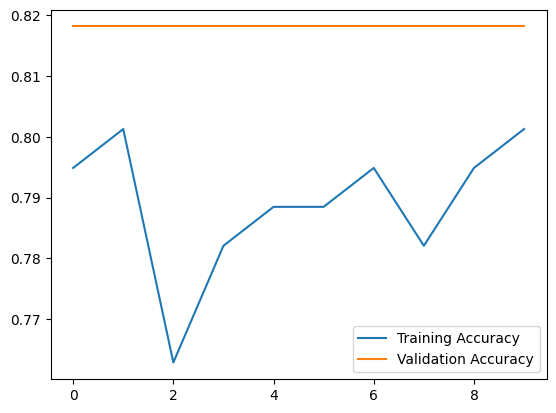

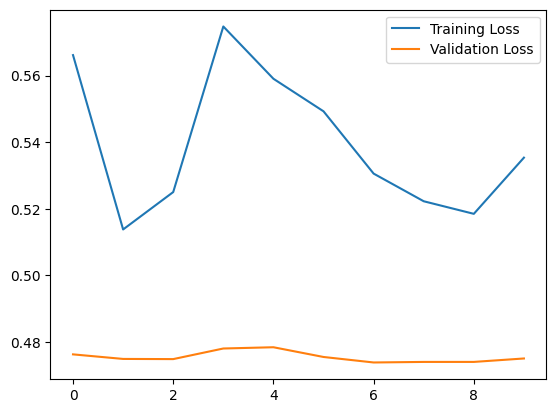

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [39]:
train_class_counts = train_generator.classes
print(np.bincount(train_class_counts))
print(train_generator.class_indices)


[ 30 126]
{'Final_Forged': 0, 'Final_Genuine': 1}


Since, The forged class was not augmented there is a heavy imbalance in model training. Now , two methods to subsidise the effect of this imbalance will be taken:
1. Giving class weights to minority class
2. Aggressive augmentation of the forged class


## Approach 1: Giving class weights to minority class

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

class_weights = {0: len(train_generator.classes)/15, 1: len(train_generator.classes)/258}


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training the model with class weights and early stopping
history_weighted = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[early_stopping]
)




Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.7886 - loss: 3.2968 - precision: 0.8137 - recall: 0.9621 - val_accuracy: 0.8182 - val_loss: 0.5359 - val_precision: 0.8182 - val_recall: 1.0000
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6329 - loss: 2.1743 - precision: 0.8107 - recall: 0.7175 - val_accuracy: 0.1818 - val_loss: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3068 - loss: 1.3787 - precision: 0.8177 - recall: 0.1874 - val_accuracy: 0.1818 - val_loss: 1.5347 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.2301 - loss: 1.3097 - precision: 0.7222 - recall: 0.0334 - val_accuracy: 0.1818 - val_loss: 1.9457 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
1/5 ━━━━━━━━━━━━━━━━━━━━ 35s 9s/step - accuracy: 0.2500 - loss: 1.3226 - precision: 0.0000e+00 - recall: 0.0000e+00

In [ ]:
# Evaluate the model with class weights
val_loss_weighted, val_accuracy_weighted, val_precision_weighted, val_recall_weighted = model.evaluate(validation_generator)
print(f"Class Weighting - Validation Accuracy: {val_accuracy_weighted}")
print(f"Class Weighting - Validation Precision: {val_precision_weighted}")
print(f"Class Weighting - Validation Recall: {val_recall_weighted}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 943ms/step - accuracy: 0.9106 - loss: 0.3992 - precision: 0.9106 - recall: 1.0000
Class Weighting - Validation Accuracy: 0.9482758641242981
Class Weighting - Validation Precision: 0.9482758641242981
Class Weighting - Validation Recall: 1.0


In [ ]:


early_stopping_2 = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

# Training the model with class weights and early stopping
history_weighted_2 = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[early_stopping_2]
)




Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8280 - loss: 1.3070 - precision: 0.9648 - recall: 0.8536 - val_accuracy: 0.9483 - val_loss: 0.3875 - val_precision: 0.9483 - val_recall: 1.0000
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7540 - loss: 1.5274 - precision: 0.9483 - recall: 0.7849 - val_accuracy: 0.9483 - val_loss: 0.5297 - val_precision: 0.9483 - val_recall: 1.0000
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 36s 937ms/step - accuracy: 0.6228 - loss: 1.8714 - precision: 0.9286 - recall: 0.6502 - val_accuracy: 0.2500 - val_loss: 0.7211 - val_precision: 1.0000 - val_recall: 0.2091
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 804ms/step - accuracy: 0.4424 - loss: 1.6588 - precision: 0.9325 - recall: 0.4411 - val_accuracy: 0.1293 - val_loss: 0.7587 - val_precision: 1.0000 - val_recall: 0.0818
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.3869 - loss: 1.7588 - precision: 0.9359 - recall: 0.3636 - val_accuracy: 0.3276 - val_loss: 0.7137 - val_pre

## Approach 2: Data Augmentation for Minority Class

In [ ]:
genuine_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3
)

# Data augmentation for forged classes
forged_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3
)

# Generator for genuine images
genuine_generator = genuine_datagen.flow_from_directory(
    '/content/drive/My Drive/Bajaj-HackRX/datasets/Final_data/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Generator for forged images (from both subfolders)
forged_generator_type01 = forged_datagen.flow_from_directory(
    '/content/drive/My Drive/Bajaj-HackRX/datasets/Final_data/preprocessed_forged/type01',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

forged_generator_type02 = forged_datagen.flow_from_directory(
    '/content/drive/My Drive/Bajaj-HackRX/datasets/Final_data/preprocessed_forged/type02',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)


Found 273 images belonging to 2 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [ ]:
import numpy as np

def balanced_generator(genuine_gen, forged_gen1, forged_gen2, batch_size=32):
    while True:
        genuine_batch = next(genuine_gen)
        forged_batch1 = next(forged_gen1)
        forged_batch2 = next(forged_gen2)

        # Combine the batches
        combined_images = np.concatenate([genuine_batch[0], forged_batch1[0], forged_batch2[0]], axis=0)
        combined_labels = np.concatenate([genuine_batch[1], forged_batch1[1], forged_batch2[1]], axis=0)

        # Shuffle the combined data
        indices = np.arange(combined_images.shape[0])
        np.random.shuffle(indices)

        yield combined_images[indices], combined_labels[indices]

# Using balanced generator for training
balanced_train_generator = balanced_generator(genuine_generator, forged_generator_type01, forged_generator_type02)

# Training the model using the combined balanced generator
history = model.fit(
    balanced_train_generator,
    steps_per_epoch=len(genuine_generator),
    epochs=20,
    validation_data=validation_generator
)
